Epoch 1/400


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 608.2498 - root_mean_squared_error: 24.6627
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 589.1020 - root_mean_squared_error: 24.2714
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 575.5065 - root_mean_squared_error: 23.9897
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 564.2969 - root_mean_squared_error: 23.7549
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 554.4730 - root_mean_squared_error: 23.5473
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 545.5721 - root_mean_squared_error: 23.3575
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 537.3367 - root_mean_squared_error: 23.1805
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 529.6072 - root_mean_squared_error: 23.0132
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 522.2764 - root_mean_squared_error: 22.8534
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 515.2692 - root_mean_squared_error

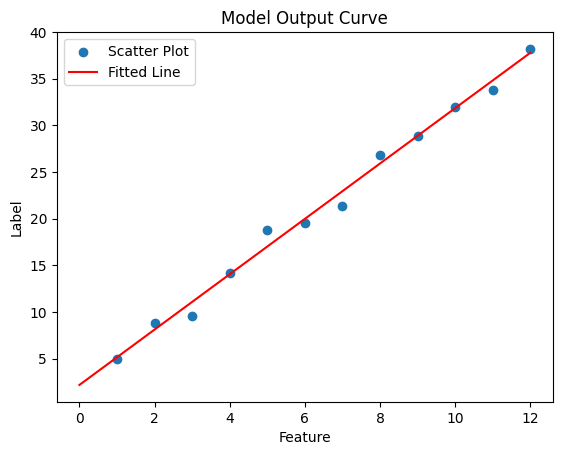

Trained weight =  2.9668038
Trained_bias =  2.188695


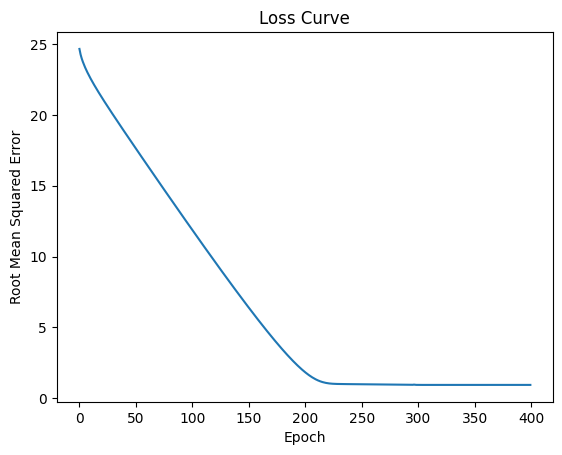

In [40]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from numpy import array

learning_rate = 0.015
epochs = 400
batch_size = 12
my_feature = array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

def build_model(learning_rate):
    #Define NN layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

    #Compile model with RMS compiler
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    #Fit the model with the x_ and y_train values, returns history obj
    history = model.fit(x=feature, y=label, epochs=epochs, batch_size=batch_size)
    #Get the trained models weight and bias
    weights, bias = model.get_weights()
    epochs = history.epoch
    df_history = pd.DataFrame(history.history)
    rmse = df_history['root_mean_squared_error']
    return weights[0][0], bias[0], epochs, rmse

def plot_model(trained_weight, trained_bias, feature, label):
    plt.title("Model Output Curve")
    plt.xlabel("Feature")
    plt.ylabel("Label")
    #Plot model data
    plt.scatter(feature, label, label="Scatter Plot")
    #Plot line over top
    #       x0,   x1,          #y0,                 y1 = mx+c
    line = [0, feature[-1], trained_bias, trained_weight*feature[-1]+trained_bias]
    plt.plot(line[:2], line[2:], 'r', label="Fitted Line")
    plt.legend()
    plt.show()


def plot_loss_curve(epochs, rms_error):
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rms_error)
    plt.show()

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model=my_model, feature=my_feature, label=my_label, epochs=epochs, batch_size=batch_size)
plot_model(trained_weight, trained_bias, my_feature, my_label)
print("Trained weight = ", trained_weight)
print("Trained_bias = ", trained_bias)
plot_loss_curve(epochs, rmse)